In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./paysim.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [7]:
df = df.rename(columns={
    'nameOrig': "name_Source",
    'oldbalanceOrg': "old_balance_Source",
    'newbalanceOrig': "new_balance_Source",
    'nameDest': "name_Destination",
    'oldbalanceDest': "old_balance_Destination",
    'newbalanceDest': "new_balance_Destination",
    "isFraud": "is_fraud",
    "isFlaggedFraud": "is_flagged_fraud"
})

In [9]:
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [12]:
import seaborn as sns

In [14]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    discrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate

In [15]:
import matplotlib.pyplot as plt

In [18]:
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

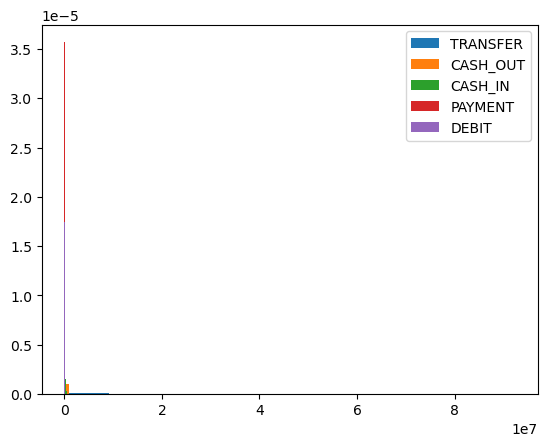

In [32]:
_, ax = plt.subplots()

ax.hist(df.query("type == 'TRANSFER'").amount, density=True, label="TRANSFER")
ax.hist(df.query("type == 'CASH_OUT'").amount, density=True, label="CASH_OUT")
ax.hist(df.query("type == 'CASH_IN'").amount, density=True, label="CASH_IN")
ax.hist(df.query("type == 'PAYMENT'").amount, density=True, label="PAYMENT")
ax.hist(df.query("type == 'DEBIT'").amount, density=True, label="DEBIT")

ax.legend()

plt.show()

In [33]:
transfer_data = df.query("type == 'TRANSFER'")
transfer_data

,step,type,amount,name_Source,old_balance_Source,new_balance_Source,name_Destination,old_balance_Destination,new_balance_Destination,is_fraud,is_flagged_fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0


In [76]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [71]:
data = df.query("type == 'CASH_OUT'")

In [77]:
X = data.iloc[:,:-2]
X = X.drop(columns=["type", "name_Source", "name_Destination", "step"])
X = StandardScaler().fit_transform(X)

In [78]:
pca = PCA(n_components=2)

x_pca_comps = pca.fit_transform(X)
pca_df = pd.DataFrame(data=x_pca_comps, columns=["pca1", "pca2"], index=data.index)
pca_df["label"] = data["is_fraud"]

In [79]:
pca_df.label.value_counts()

label
0    2233384
1       4116
Name: count, dtype: int64

<Axes: xlabel='pca1', ylabel='pca2'>

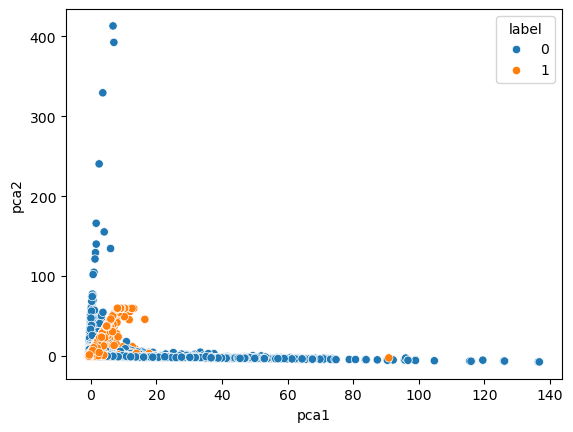

In [80]:
sns.scatterplot(data=pca_df, x="pca1", y="pca2", hue="label")

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("../datasets/02_staged/processed_paysim.csv")
data

,step,type,amount,name_Source,old_balance_Source,new_balance_Source,name_Destination,old_balance_Destination,new_balance_Destination,is_fraud,is_flagged_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
data.shape

(6362620, 11)

In [7]:
data.is_fraud.value_counts(normalize=True)

is_fraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64

In [121]:
paysim_data_stats = (
    data.groupby(["type"])["is_fraud"].value_counts().unstack(fill_value=0)
)
paysim_data_stats["total_transactions"] = paysim_data_stats.sum(axis=1)
paysim_data_stats.rename(
    columns={0: "non-fraud transactions", 1: "fraud_transactions"}, inplace=True
)
paysim_data_stats.sort_index(inplace=True)

paysim_data_stats.loc["TOTAL_ALL_TYPE"] = paysim_data_stats.sum(axis=0)
paysim_data_stats.reset_index(inplace=True)

In [122]:
paysim_data_stats.columns.name = ""
paysim_data_stats

,type,non-fraud transactions,fraud_transactions,total_transactions
0,CASH_IN,1399284,0,1399284
1,CASH_OUT,2233384,4116,2237500
2,DEBIT,41432,0,41432
3,PAYMENT,2151495,0,2151495
4,TRANSFER,528812,4097,532909
5,TOTAL_ALL_TYPE,6354407,8213,6362620


In [113]:
data.groupby("is_fraud")["type"].value_counts().loc[1].index

Index(['CASH_OUT', 'TRANSFER'], dtype='object', name='type')

In [12]:
data.groupby("type")["is_fraud"].value_counts()

type      is_fraud
CASH_IN   0           1399284
CASH_OUT  0           2233384
          1              4116
DEBIT     0             41432
PAYMENT   0           2151495
TRANSFER  0            528812
          1              4097
Name: count, dtype: int64

In [124]:
from sklearn.model_selection import train_test_split

In [129]:
data

,step,type,amount,name_Source,old_balance_Source,new_balance_Source,name_Destination,old_balance_Destination,new_balance_Destination,is_fraud,is_flagged_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [138]:
data = data[data.type.isin(["TRANSFER", "CASH_OUT"])]
data.reset_index(drop=True, inplace=True)

In [201]:
        data = data.query("type == 'TRANSFER'")

In [202]:
X = data[["amount", "old_balance_Source", "new_balance_Source", "old_balance_Destination", "new_balance_Destination"]]
y = data["is_fraud"]

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=(1 - 0.7/0.85))

xsh = X.shape[0]
print(X_train.shape[0] / xsh)
print(X_val.shape[0] / xsh)
print(X_test.shape[0] / xsh)

print(X_train.shape[0])
print(X_val.shape[0])
print(X_test.shape[0])

0.6999975605591199
0.1500012197204401
0.1500012197204401
373035
79937
79937


In [227]:
X_train["is_fraud"] = y_train
X_train

,amount,old_balance_Source,new_balance_Source,old_balance_Destination,new_balance_Destination,target,is_fraud
1892425,577664.21,0.00,0.00,4062244.76,4639908.96,0,0
1161298,375839.00,0.00,0.00,888732.52,1264571.51,0,0
114154,303843.61,193.00,0.00,171593.16,516759.75,0,0
2620312,1097318.11,0.00,0.00,3034380.61,4131698.72,0,0
1630477,305896.31,62811.00,0.00,17672421.59,17978317.90,0,0
...,...,...,...,...,...,...,...
1989144,16597418.54,9325.46,0.00,40763967.76,57361386.30,0,0
2583763,133326.34,229953.19,96626.84,723863.67,1159194.66,0,0
2741343,426712.72,0.00,0.00,8074036.48,8500749.20,0,0
21303,162153.46,0.00,0.00,1161888.04,1901357.39,0,0


In [217]:
y.value_counts(normalize=True) * 100

is_fraud
0    99.231201
1     0.768799
Name: proportion, dtype: float64

In [204]:
xsh

532909

In [177]:
0.7 * 0.85

0.595

In [ ]:
70 + 15 + 15

85 + 15

# 0.7 x N

# ? x (0.85N)

# 0.7 x (0.85N)